# 1.5 Supervised Learning Algorithms Part 2

#### Import libraries and scaled weather data set 
#### Import pleasant weather CSV 
#### Drop info on Gdansk, Roma and Tours from the scaled data dataframe
#### Drop the month and date
#### Run the decision tree model
#### Create a multilabel confusion matrix for the scaled dataframe for training and testing

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [5]:
# Define path
path = r'C:\Users\melan\OneDrive\Career Foundry\Machine Learning with Python\Data Sets'

In [6]:
path

'C:\\Users\\melan\\OneDrive\\Career Foundry\\Machine Learning with Python\\Data Sets'

In [7]:
# Import scaled dataframe from Data Sets, with index_col = 0 so an Unnamed:0 column isn't created!
weather_scaled = pd.read_csv(os.path.join(path, 'weather_scaled.csv'), index_col = 0)

In [8]:
# Import pleasant weather answers csv file
pleasant_weather = pd.read_csv(os.path.join(path,'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

In [9]:
weather_scaled.head()

,DATE,id,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.731975,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.731824,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.731673,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.731523,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.731372,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [10]:
pleasant_weather.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Reduce to just the temperature variables (excluding Gdansk, Roma, Tours)
df_exc = weather_scaled[['DATE', 'MONTH','BASEL_temp_mean','BASEL_temp_min','BASEL_temp_max',        
 'BELGRADE_temp_mean','BELGRADE_temp_min','BELGRADE_temp_max',
 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max',
 'DEBILT_temp_mean','DEBILT_temp_min','DEBILT_temp_max',
 'DUSSELDORF_temp_mean','DUSSELDORF_temp_min','DUSSELDORF_temp_max',
 'HEATHROW_temp_mean','HEATHROW_temp_min','HEATHROW_temp_max',
 'KASSEL_temp_mean','KASSEL_temp_min','KASSEL_temp_max',
 'LJUBLJANA_temp_mean','LJUBLJANA_temp_min','LJUBLJANA_temp_max',
 'MAASTRICHT_temp_mean','MAASTRICHT_temp_min','MAASTRICHT_temp_max',
 'MADRID_temp_mean','MADRID_temp_min','MADRID_temp_max',
 'MUNCHENB_temp_mean','MUNCHENB_temp_min','MUNCHENB_temp_max',
 'OSLO_temp_mean','OSLO_temp_min','OSLO_temp_max',
 'SONNBLICK_temp_mean','SONNBLICK_temp_min','SONNBLICK_temp_max',   
 'STOCKHOLM_temp_mean','STOCKHOLM_temp_min','STOCKHOLM_temp_max',
 'VALENTIA_temp_mean','VALENTIA_temp_min','VALENTIA_temp_max']].copy()

In [12]:
df_exc.head()

,DATE,MONTH,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_temp_mean,BUDAPEST_temp_min,...,OSLO_temp_max,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,-0.528623,-0.845652,-0.478356,-1.016876,-1.220210,-0.949203,-1.099163,-1.119431,...,-0.474865,-0.124331,-0.170125,-0.063322,-0.391072,-0.290439,-0.639538,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,-0.582946,-0.462450,-0.569988,-1.107669,-0.818702,-1.298119,-1.110927,-0.878727,...,-0.582847,-0.650834,-0.456455,-0.839563,-0.415953,-0.183610,-0.628550,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,-0.257010,-0.186545,-0.592896,-1.084971,-1.168403,-1.098738,-1.063873,-0.838610,...,-0.777215,-0.650834,-0.384873,-0.898147,-0.615003,-0.410621,-0.727444,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-0.555784,-0.385810,-0.512718,-1.209812,-1.362681,-1.437685,-1.146217,-1.012452,...,-0.582847,-0.943336,-0.800052,-1.059254,-0.764290,-0.530804,-0.925231,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,-1.003946,-1.075573,-1.039603,-1.209812,-1.012980,-1.457623,-1.087400,-0.918844,...,-0.582847,-0.621584,-0.671203,-0.546642,-0.503037,-0.477389,-0.705467,-1.509396,-1.339569,-1.471186


In [13]:
#Create an 'X' matrix by dropping the DATE & MONTH columns.
X = df_exc.drop(['DATE', 'MONTH'], axis=1)
y = pleasant_weather.drop(['DATE'], axis = 1)

In [14]:
print(X.shape)
print(y.shape)

(22950, 45)
(22950, 15)


In [15]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 45)
(5738, 45)
(17212, 15)
(5738, 15)


[Text(0.33684662744079985, 0.984375, 'x[14] <= 0.403\ngini = 0.316\nsamples = 17212\nvalue = [[12948, 4264]\n[11182, 6030]\n[11619, 5593]\n[13854, 3358]\n[13509, 3703]\n[13421, 3791]\n[14361, 2851]\n[12379, 4833]\n[13622, 3590]\n[9535, 7677]\n[13637, 3575]\n[14492, 2720]\n[17212, 0]\n[14290, 2922]\n[16314, 898]]'),
 Text(0.07141478432492432, 0.953125, 'x[29] <= -0.216\ngini = 0.099\nsamples = 10778\nvalue = [[10106, 672]\n[9045, 1733]\n[9508, 1270]\n[10688, 90]\n[10778, 0]\n[10142, 636]\n[10697, 81]\n[9817, 961]\n[10710, 68]\n[8023, 2755]\n[10368, 410]\n[10511, 267]\n[10778, 0]\n[10529, 249]\n[10616, 162]]'),
 Text(0.020164064356404072, 0.921875, 'x[5] <= 0.053\ngini = 0.028\nsamples = 7558\nvalue = [[7435, 123]\n[6871, 687]\n[7205, 353]\n[7545, 13]\n[7558, 0]\n[7519, 39]\n[7537, 21]\n[7340, 218]\n[7536, 22]\n[7558, 0]\n[7414, 144]\n[7524, 34]\n[7558, 0]\n[7536, 22]\n[7544, 14]]'),
 Text(0.007216541438023537, 0.890625, 'x[23] <= 0.233\ngini = 0.004\nsamples = 6450\nvalue = [[6409, 41]\

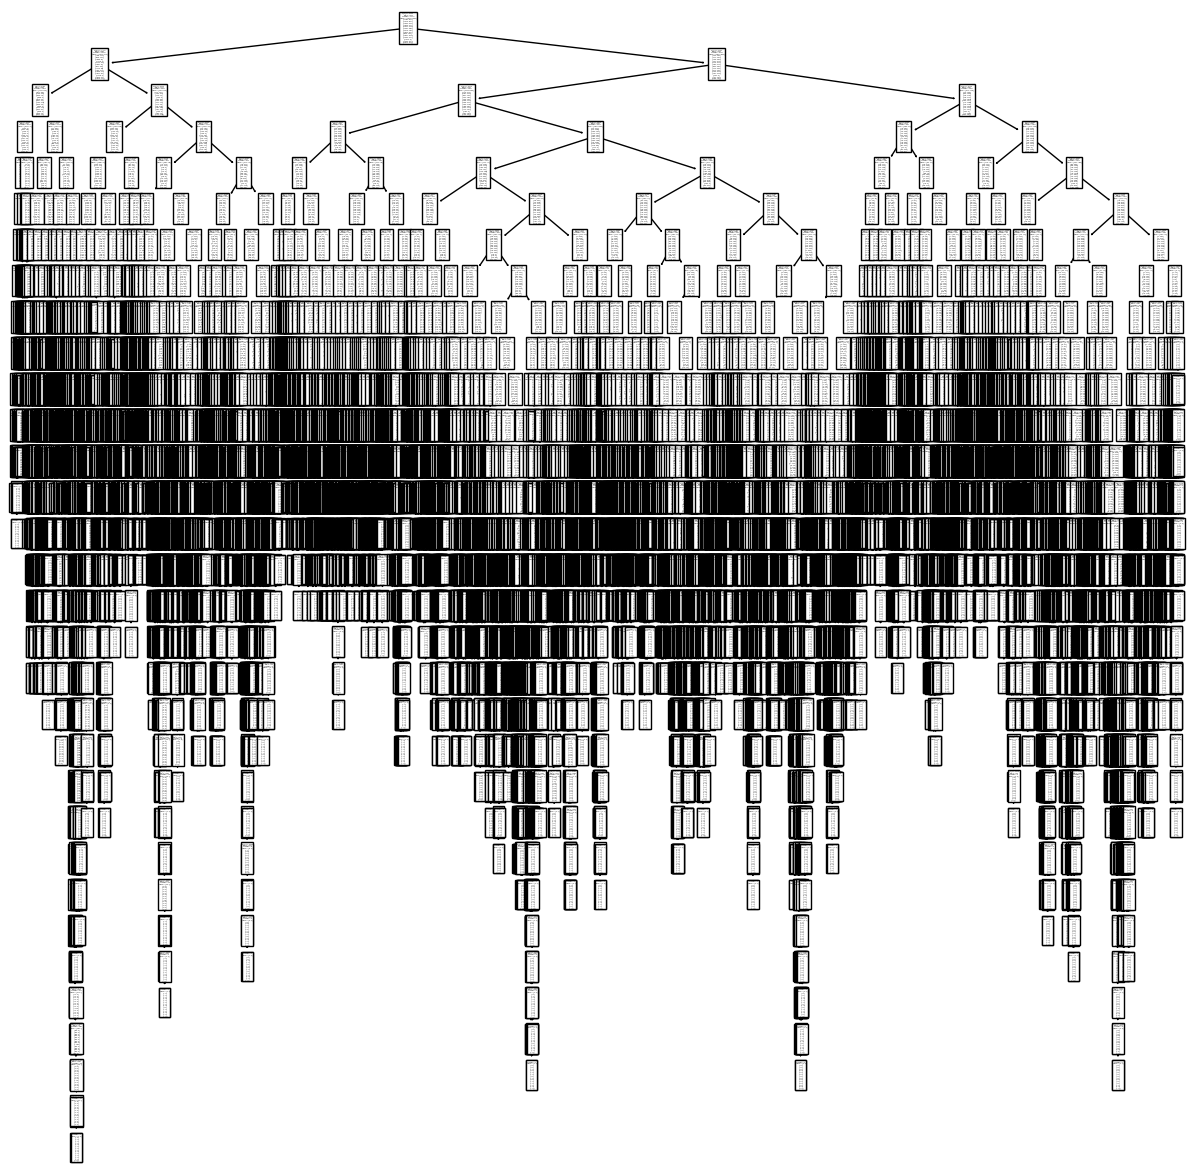

In [17]:
#Run Decision Tree classifier
weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt)

In [18]:
#What is the training accuracy score? Using the cross validation method
y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.4602021302490024


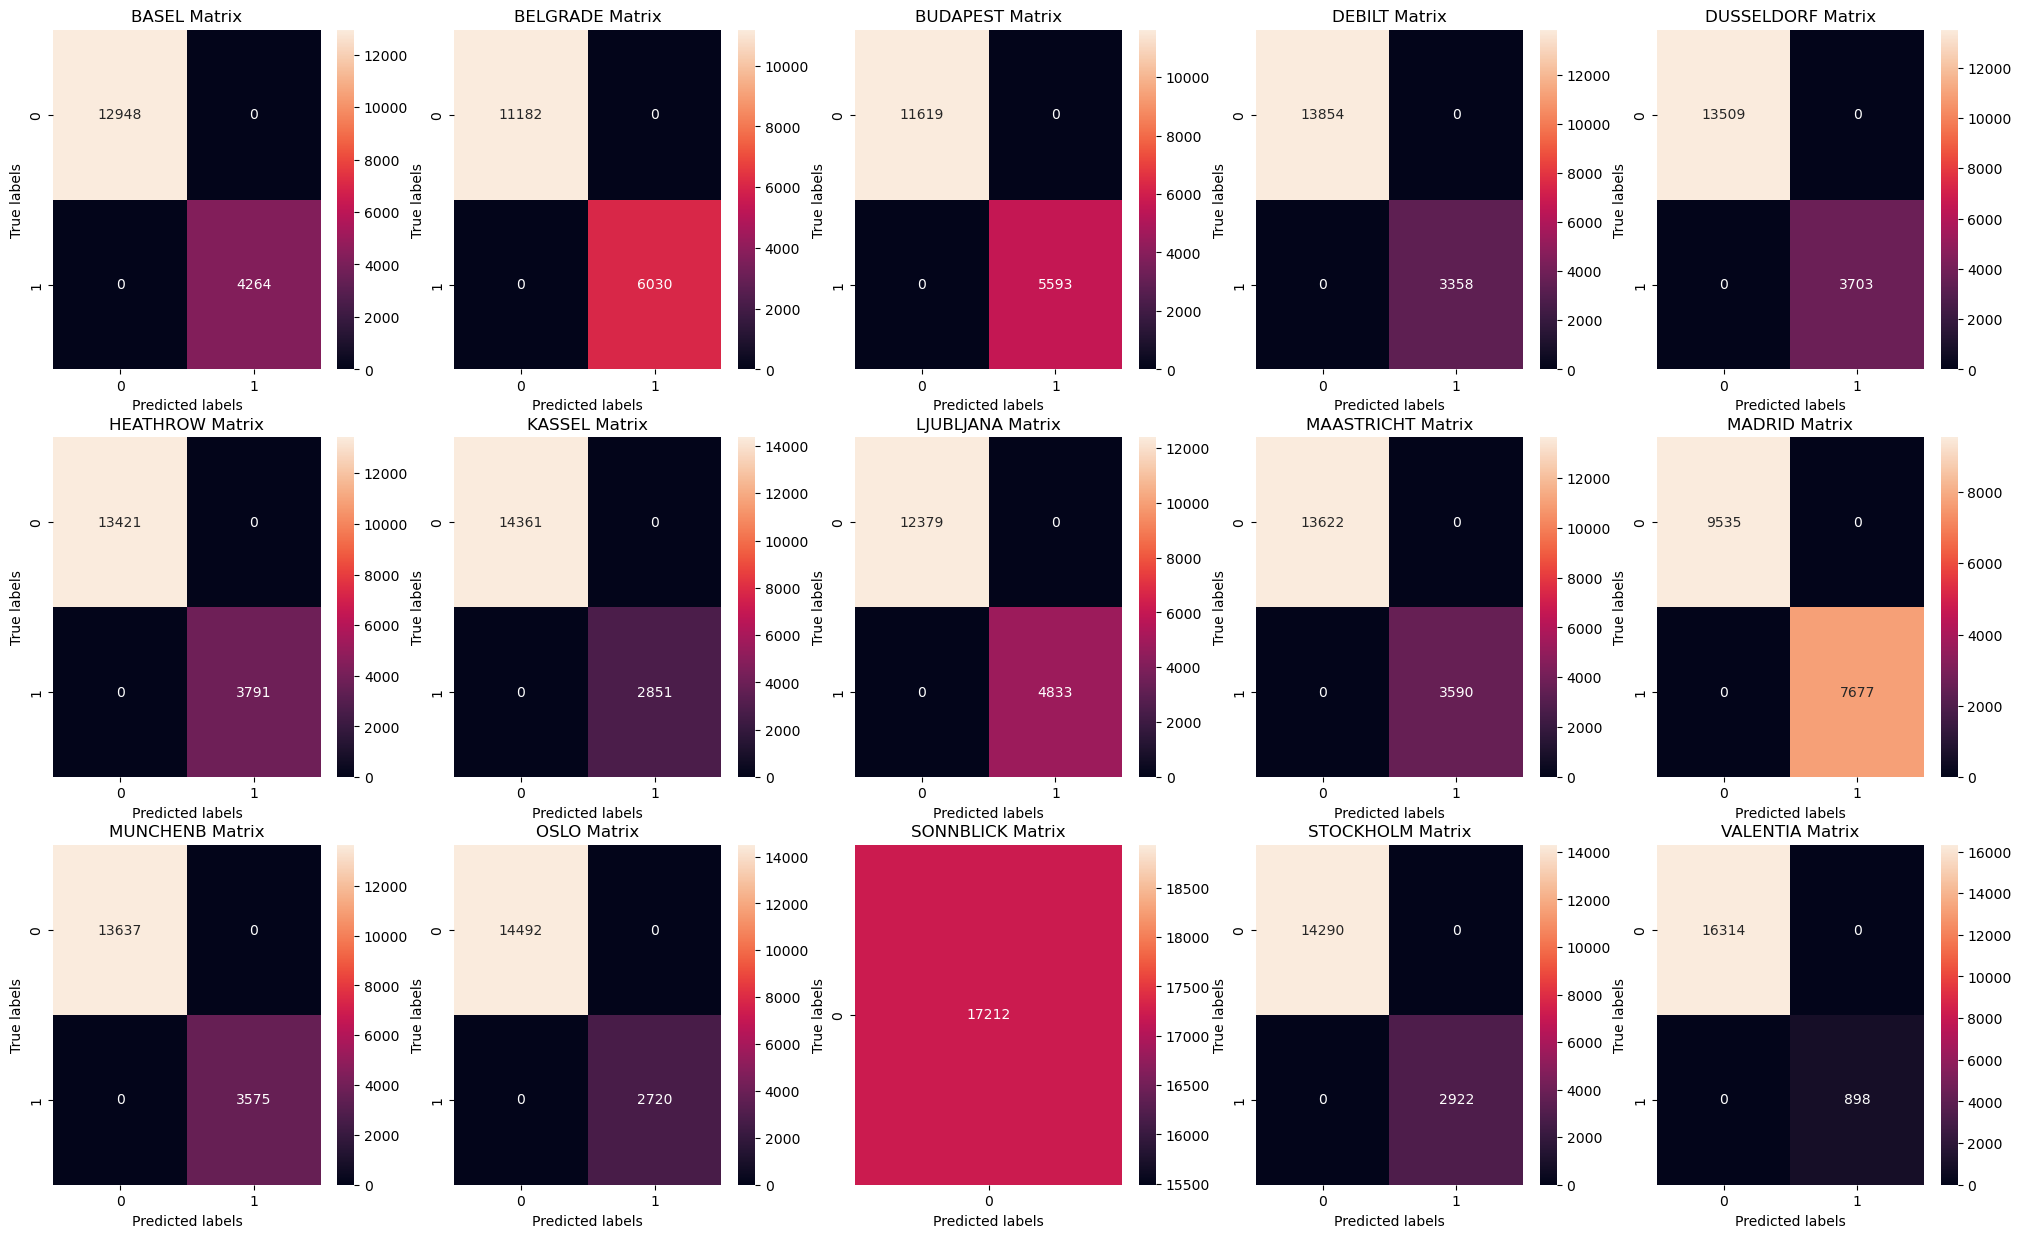

In [19]:
locations = list({x.split("_")[0] for x in df_exc.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [20]:
#What is the testing accuracy score? Using the cross validation method
y_test_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_test_pred))
multilabel_confusion_matrix(y_test, y_test_pred)

Test accuracy score:  0.47263855001742766


array([[[3878,  460],
        [ 452,  948]],

       [[3189,  587],
        [ 535, 1427]],

       [[3398,  502],
        [ 505, 1333]],

       [[4274,  363],
        [ 352,  749]],

       [[4097,  410],
        [ 413,  818]],

       [[4101,  469],
        [ 414,  754]],

       [[4488,  327],
        [ 324,  599]],

       [[3656,  539],
        [ 444, 1099]],

       [[4150,  412],
        [ 394,  782]],

       [[2813,  355],
        [ 373, 2197]],

       [[4157,  389],
        [ 386,  806]],

       [[4540,  339],
        [ 320,  539]],

       [[5738,    0],
        [   0,    0]],

       [[4411,  355],
        [ 385,  587]],

       [[5306,  156],
        [ 163,  113]]], dtype=int64)

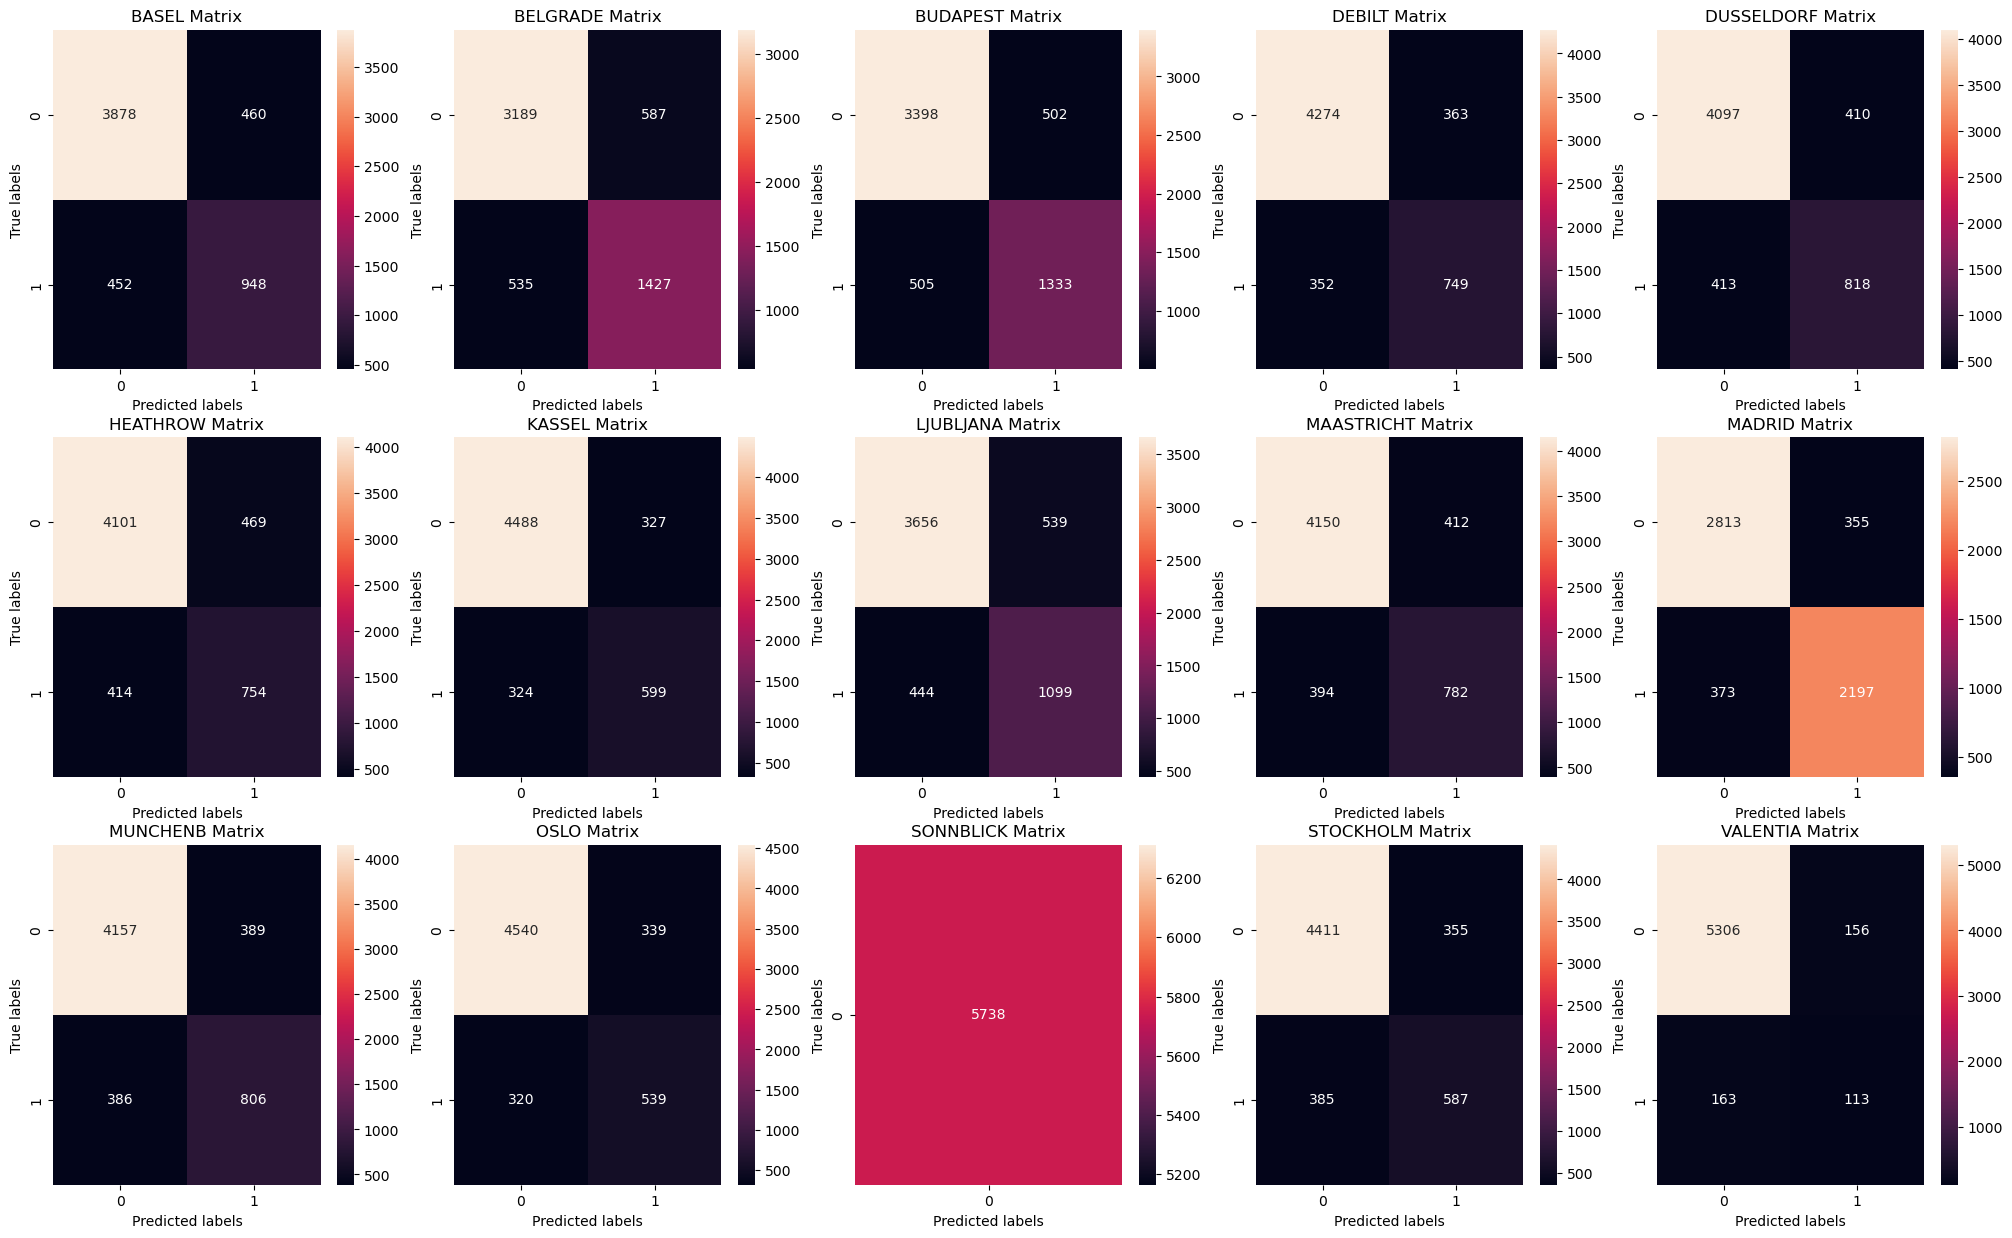

In [21]:
locations = list({x.split("_")[0] for x in df_exc.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_test_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1